# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [4]:
#define procedure here 
def check_input(test):
    row_count = 0
    col_count = 0
    x = len(test[0])
    for row in range(0,x):
        for col in range(1,x):
            if(test[row][0]==test[row][col] or type(test[row][col])==str):
                row_count = row_count + 1
    for col in range(0,3):
        for row in range(1,3):
            if(test[0][col]==test[row][col] or type(test[row][col])==str):
                col_count = col_count + 1
    if(row_count==0 and col_count==0):
        return True
    else:
        return False

In [5]:

# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]


test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

test4 = [[1,2, 3],
        [4, 3, 2],
        [3, 4, 1],
        [2, 1, 4]]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false
#print(check_input(test4)) # must return false

True
False
False


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [6]:
import pandas as pd
data = pd.read_csv('/content/StudentMarkSheet.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student name  200 non-null    object 
 1   Exam name     199 non-null    object 
 2   Exam date     200 non-null    object 
 3   Marks         197 non-null    float64
dtypes: float64(1), object(3)
memory usage: 6.4+ KB


,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [7]:
print("No of rows before :",len(data))

No of rows before : 200


In [8]:
null_values = data.isnull()
print(null_values.sum())
print(" ")
print(data[data.isnull().any(axis=1)].head())

Student name    0
Exam name       1
Exam date       0
Marks           3
dtype: int64
 
            Student name    Exam name   Exam date  Marks
47           Ryan Herman    Chemistry  15/06/2016    NaN
78         Nelle Skinner  Mathematics  29/07/2016    NaN
104            Myra Wall   Philosophy  02/06/2016    NaN
188  Demetrius Castaneda          NaN  21/06/2016   67.0


In [9]:
data = data.dropna()
print("No of rows after:",len(data))

No of rows after: 196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [10]:
nam = data.loc[data['Student name'] == 'James Walker']
nam


,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
42,James Walker,Chemistry,15/06/2016,61.0
71,James Walker,Mathematics,29/07/2016,23.0
150,James Walker,Physics,10/06/2016,100.0
180,James Walker,Sociology,21/06/2016,73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [11]:
bio = data.loc[data['Exam name'] == 'Biology', 'Marks'].mean()
phy = data.loc[data['Exam name'] == 'Physics', 'Marks'].mean()
soc = data.loc[data['Exam name'] == 'Sociology', 'Marks'].mean()
mat = data.loc[data['Exam name'] == 'Mathematics', 'Marks'].mean()
che = data.loc[data['Exam name'] == 'Chemistry', 'Marks'].mean()
ph = data.loc[data['Exam name'] == 'Philosophy', 'Marks'].mean()

print("Biology :",bio)
print("Physics :",phy)
print("Sociology :",soc)
print("Mathematics :",mat)
print("Chemistry :",che)
print("Philosphy :",ph)

Biology : 47.89473684210526
Physics : 51.76190476190476
Sociology : 56.026315789473685
Mathematics : 48.97222222222222
Chemistry : 50.57692307692308
Philosphy : 47.270270270270274


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

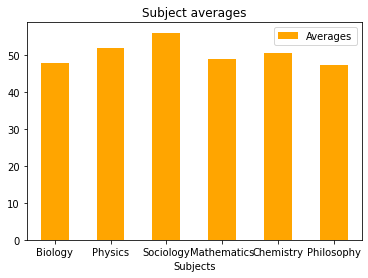

In [12]:
import matplotlib.pyplot as plt
bar_graph = pd.DataFrame({ 'Subjects': ['Biology','Physics','Sociology','Mathematics','Chemistry','Philosophy'],'Averages': [47.89473684210526, 51.76190476190476, 56.026315789473685, 48.97222222222222,50.57692307692308,47.270270270270274]})
dra = bar_graph.plot.bar(x='Subjects', y='Averages',rot=0,color='orange',title = 'Subject averages')
#plt.rcParams["figure.figsize"] = (6,6)


---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [13]:
data_cat = pd.read_csv('/content/CatData.csv')
null_values = data_cat.isnull()
data.dropna()
print(null_values.sum())
data_cat

Tail Length (cm)    0
Mass (kg)           0
dtype: int64


,Tail Length (cm),Mass (kg)
0,18.1,3.750
1,18.6,3.800
2,19.5,3.250
3,19.3,3.450
4,19.0,3.650
...,...,...
337,20.7,4.000
338,20.2,3.400
339,19.3,3.775
340,21.0,4.100


**Part B** - Identify the independant and dependant variables (comment answer below)

In [14]:
# dependant variable: mass
# independant variable: tail length

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [15]:
from sklearn import linear_model
import numpy as np
data_cat = data_cat[["Tail Length (cm)","Mass (kg)"]]
num = int(len(data_cat)*0.8)
train = data[:num]
test = data[num:]
regression_model = linear_model.LinearRegression()
train_x = data_cat[["Tail Length (cm)"]].values
train_y =data_cat[["Mass (kg)"]].values

**Part D** - Print the values for slope and y-intercept

In [16]:
regression_model.fit(train_x,train_y)
coefficents = regression_model.coef_
intercept = regression_model.intercept_
print("Slope :",coefficents)
print("Intercept :",intercept)

Slope : [[0.49685566]]
Intercept : [-5.78083136]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

Text(0, 0.5, 'Mass (kg)')

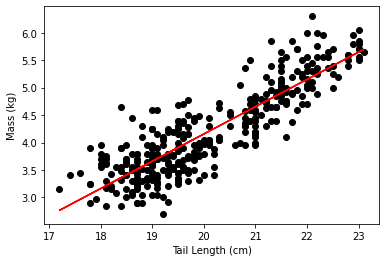

In [17]:
#plt.scatter(train_x,train_y,color ='black')
plt.scatter(data_cat["Tail Length (cm)"],data_cat["Mass (kg)"],color = 'black')
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(train_x,coefficents[0]*train_x + intercept,color = 'red' )
plt.xlabel("Tail Length (cm)")
plt.ylabel("Mass (kg)")
